#### Import the library

In [1]:
import sualib

#### Import associate libraries

In [7]:
# data storing and anaysis
import pandas as pd
import geopandas as gpd

# visualization
import matplotlib.pyplot as plt
import folium
import plotly.express as px
import shapely
import seaborn as sns

#Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import pickle

#### Import modules and libraries

In [8]:
from test_data_prepare import test_drop_columns,test_merge_dataframe
from test_eda import test_non_null_percentage_by_column,test_plot_columns_object_distribution_color,test_plot_columns_numerical_distribution_color
from test_feature_engineering import test_replace_nan_with_mean,test_replace_nan_with_mean_num_cols,test_replace_nan_with_predetermined_value, test_create_date_columns
from test_working_geo import test_create_geometry_column,test_detect_latitude_column,test_detect_longitude_column,test_export_gdf
from test_predict_ml import test_predict_store_opening

#### Import the file routes

In [32]:
#This is the route for stores file in local. 
#Update is needed to recreate the test 
path_st = r'C:\Users\plafu\OneDrive\Documentos\DS THE BRIDGE\SUA\sua_library\test_sualib\Stores.csv'

#This is the route for stores file in local. 
#Update is needed to recreate the test 
path_ci = r'C:\Users\plafu\OneDrive\Documentos\DS THE BRIDGE\SUA\sua_library\test_sualib\cities.csv'

#### Creating the dataframes with the imported files

In [33]:
#Stores dataframe  
stores_df = pd.read_csv(path_st, sep =',')

#Cities Dataframe
cities = pd.read_csv(path_ci, sep =',')

In [34]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   StoreKey      74 non-null     int64  
 1   StoreCode     74 non-null     int64  
 2   Country       74 non-null     object 
 3   State         74 non-null     object 
 4   Name          74 non-null     object 
 5   SquareMeters  73 non-null     float64
 6   OpenDate      74 non-null     object 
 7   CloseDate     16 non-null     object 
 8   Status        15 non-null     object 
dtypes: float64(1), int64(2), object(6)
memory usage: 5.3+ KB


In [37]:
from test_data_prepare import test_drop_columns,test_merge_dataframe

#### **TEST 1**: We drop some columns from cities dataframe 

In [38]:
#We check the column list before drop
cities.columns.to_list()

['id',
 'name',
 'state_id',
 'state_code',
 'state_name',
 'country_id',
 'country_code',
 'country_name',
 'latitude',
 'longitude',
 'wikiDataId']

In [39]:
#Check the shape before the test
cities.shape

(148061, 11)

In [40]:
#Define parameters to test the function
df = cities
columns = ['state_id','country_id','wikiDataId']

df = test_drop_columns(df,columns)

In [41]:
#We check the column list after drop
df.columns.to_list()

['id',
 'name',
 'state_code',
 'state_name',
 'country_code',
 'country_name',
 'latitude',
 'longitude']

In [42]:
#Check the shape after the test
df.shape

(148061, 8)

In [25]:
cities = df

In [43]:
cities.columns.to_list()

['id',
 'name',
 'state_id',
 'state_code',
 'state_name',
 'country_id',
 'country_code',
 'country_name',
 'latitude',
 'longitude',
 'wikiDataId']

In [44]:
stores_df.columns.to_list()

['StoreKey',
 'StoreCode',
 'Country',
 'State',
 'Name',
 'SquareMeters',
 'OpenDate',
 'CloseDate',
 'Status']

#### **TEST 2**: Unifiying dataframes function 

In [45]:
#Define parameter values to function

df1 = stores_df
df2 = df
key1= 'Country'
key2= 'country_name'
df_unified = test_merge_dataframe(df1, df2,key1,key2)

In [47]:
#We observe the unified dataframe
df_unified.head(3)


,StoreKey,StoreCode,Country,State,Name,SquareMeters,OpenDate,CloseDate,Status,id,name,state_code,state_name,country_code,country_name,latitude,longitude
0,10,1,Australia,Australian Capital Territory,Contoso Store Australian Capital Territory,595.0,1/1/2008,NaN,NaN,3915,Acton,ACT,Australian Capital Territory,AU,Australia,-35.27767,149.11829
1,10,1,Australia,Australian Capital Territory,Contoso Store Australian Capital Territory,595.0,1/1/2008,NaN,NaN,3923,Ainslie,ACT,Australian Capital Territory,AU,Australia,-35.26255,149.14370
2,10,1,Australia,Australian Capital Territory,Contoso Store Australian Capital Territory,595.0,1/1/2008,NaN,NaN,3974,Amaroo,ACT,Australian Capital Territory,AU,Australia,-35.16959,149.12802


In [48]:
#We check the shape
df_unified.shape

(770481, 17)

In [49]:
#Here we see the info 
df_unified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770481 entries, 0 to 770480
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   StoreKey      770481 non-null  int64  
 1   StoreCode     770481 non-null  int64  
 2   Country       770481 non-null  object 
 3   State         770481 non-null  object 
 4   Name          770481 non-null  object 
 5   SquareMeters  770481 non-null  float64
 6   OpenDate      770481 non-null  object 
 7   CloseDate     160176 non-null  object 
 8   Status        140358 non-null  object 
 9   id            770481 non-null  int64  
 10  name          770481 non-null  object 
 11  state_code    770481 non-null  object 
 12  state_name    770481 non-null  object 
 13  country_code  770481 non-null  object 
 14  country_name  770481 non-null  object 
 15  latitude      770481 non-null  float64
 16  longitude     770481 non-null  float64
dtypes: float64(3), int64(3), object(11)
memory usage

At a glance we observe some columns where we detect non-null values. In any case we're going to check with some functions the percentage of NaN values

#### **TEST 3**: TESTING THE FUNCTION OF NaN values 

StoreKey        100.000000
StoreCode       100.000000
Country         100.000000
State           100.000000
Name            100.000000
SquareMeters    100.000000
OpenDate        100.000000
CloseDate        20.789091
Status           18.216932
id              100.000000
name            100.000000
state_code      100.000000
state_name      100.000000
country_code    100.000000
country_name    100.000000
latitude        100.000000
longitude       100.000000
dtype: float64


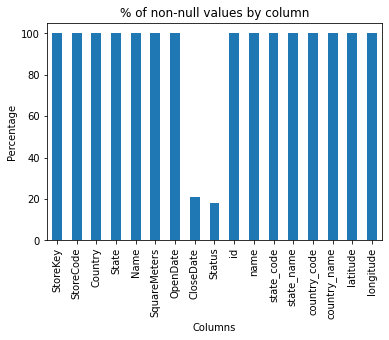

In [51]:
test_non_null_percentage_by_column(df_unified)

### Close date and status have the most values of NaN in all datasets

#### **TEST 4**: FEATURE ENGINEERING FUNCTIONS

In [52]:
#We're goiong to test the dates creation
df = df_unified
date_col = 'OpenDate'
df = test_create_date_columns(df,date_col)

c:\Users\plafu\OneDrive\Documentos\DS THE BRIDGE\SUA\sua_library\test_sualib\test_feature_engineering.py:111: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = pd.to_datetime(df[date_col]).dt.week


In [53]:
df_unified.columns.to_list()

['StoreKey',
 'StoreCode',
 'Country',
 'State',
 'Name',
 'SquareMeters',
 'OpenDate',
 'CloseDate',
 'Status',
 'id',
 'name',
 'state_code',
 'state_name',
 'country_code',
 'country_name',
 'latitude',
 'longitude',
 'year',
 'month',
 'month_name',
 'day',
 'day_name',
 'week']

#### **TEST 6**: TESTING SOME EDA FUNCTIONS

This function allow us i.e count values for object column types in purple color

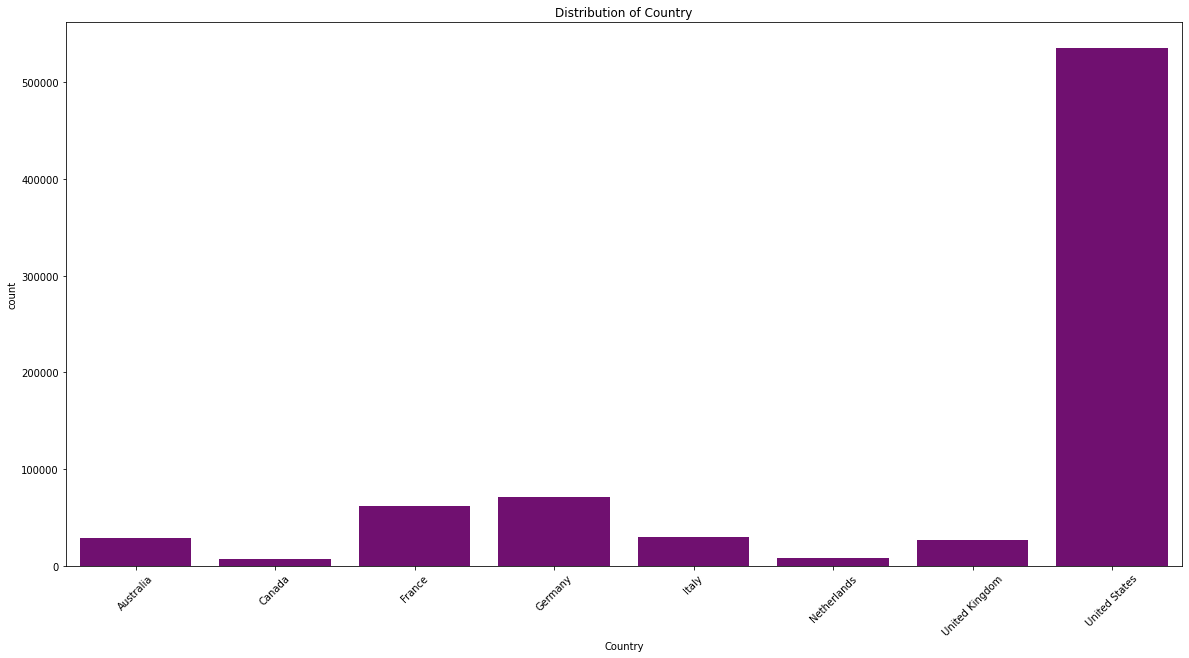

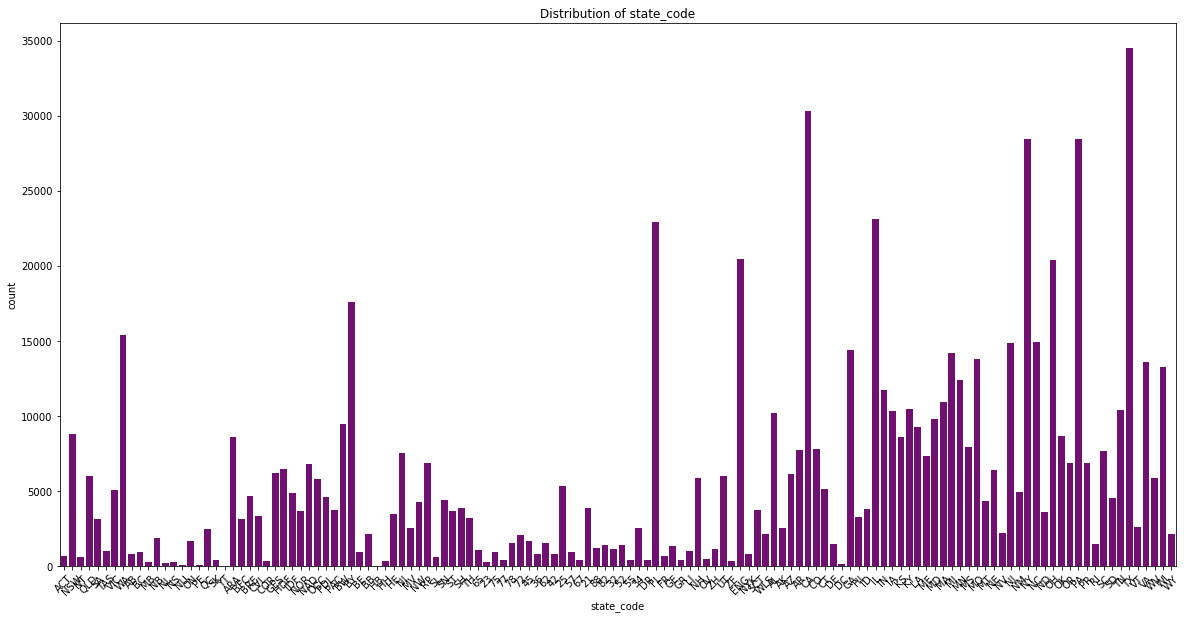

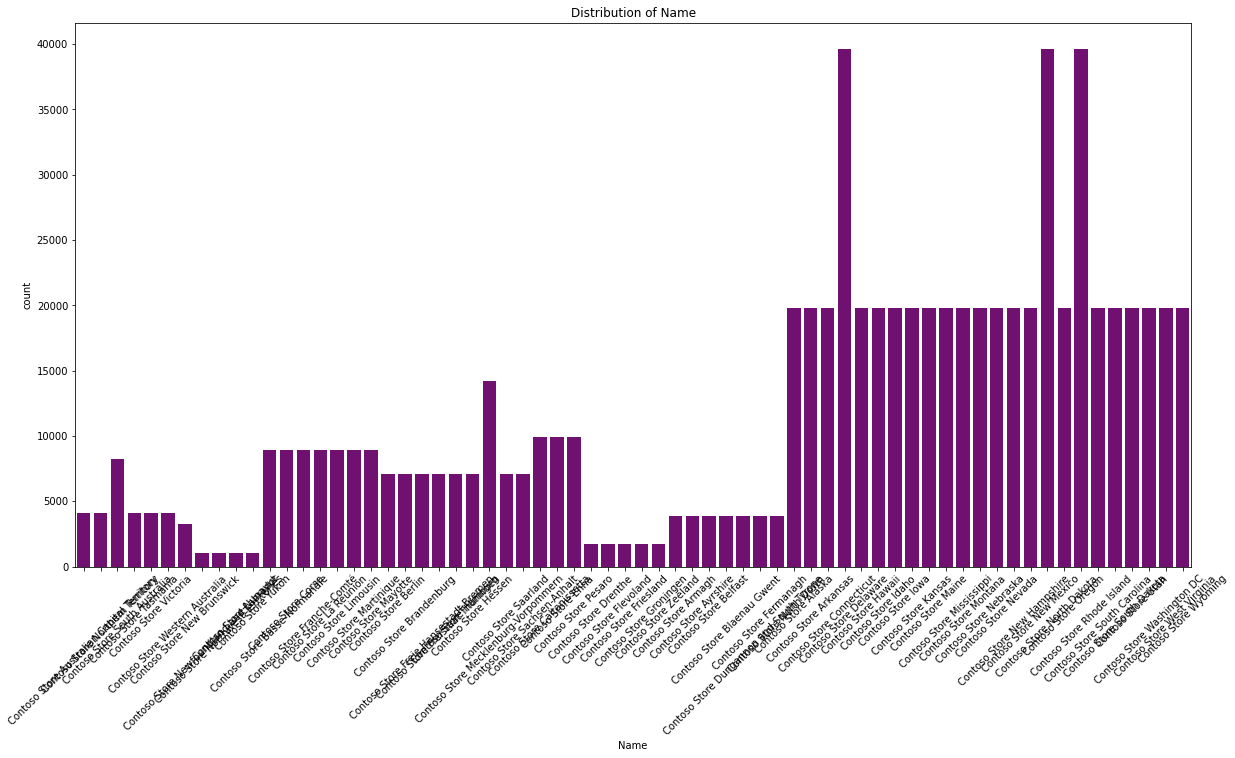

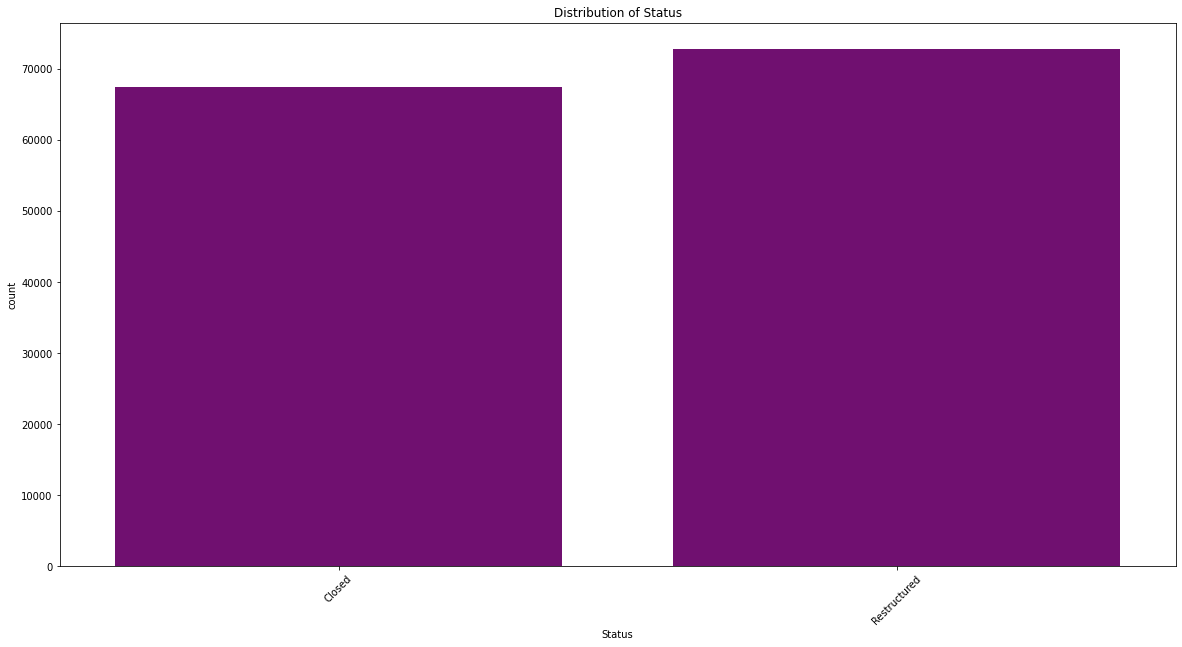

In [54]:
#Vamos a invocar a la funcion con algunas de las columnas de nuestro geodataframe
columns = ['Country','state_code','Name','Status','name']
kind = 'count'
test_plot_columns_object_distribution_color(df_unified, columns, kind=kind)

### Checking your docstring list by __doc__

In [ ]:
test_drop_columns.__doc__
test_merge_dataframe.__doc__
test_non_null_percentage_by_column.__doc__
test_plot_columns_object_distribution_color.__doc__
test_plot_columns_numerical_distribution_color.__doc__
test_replace_nan_with_mean.__doc__
test_replace_nan_with_mean_num_cols.__doc__
test_replace_nan_with_predetermined_value.__doc__
test_create_date_columns.__doc__
test_create_geometry_column.__doc__
test_detect_latitude_column.__doc__
test_detect_longitude_column.__doc__
test_export_gdf.__doc__
test_predict_store_opening.__doc__


### Checking your docstring list by help 

In [ ]:
help(test_drop_columns)
help(test_merge_dataframe)
help(test_non_null_percentage_by_column)
help(test_plot_columns_object_distribution_color)
help(test_plot_columns_numerical_distribution_color)
help(test_replace_nan_with_mean_num_cols)
help(test_replace_nan_with_predetermined_value)
help(test_create_date_columns)
help(test_create_geometry_column)
help(test_detect_latitude_column)
help(test_detect_longitude_column)
help(test_export_gdf)
help(test_predict_store_opening)